In [1]:
#Import Dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
#Path to CSV
charging_stations_csv = "./Public_Electric_Vehicle_Charging_Stations_and_Alternative_Fuel_Stations_in_Maryland.csv"
electric_vehicles_csv = "./MD_MDOT_MVA_Electric_and_Plug-in_Hybrid_Vehicle_Registrations_by_Zip_Code_as_of_Each_Month_End_from_July_2020_to_July_2023.csv"
maryland_zipcode_csv = "./Zip_Code_Lookup_Table.csv"
charging_stations_23 = "./alt_fuel_stations (Sep 21 2023).csv"

In [3]:
charging_stations_23_df = pd.read_csv(charging_stations_23)
charging_stations_23_df.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV On-Site Renewable Source,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas,Maximum Vehicle Class
0,ELEC,Municipal Garage,200 N Holliday St,NaN,Baltimore,MD,21202,NaN,443-573-2800,E,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD
1,ELEC,Bel Air Nissan,1506 Bel Air Rd,NaN,Bel Air,MD,21014,NaN,410-879-1133,E,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD
2,ELEC,Community College of Baltimore County (CCBC),800 S Rolling Rd,Lot 8,Catonsville,MD,21228,NaN,443-840-2222,E,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD
3,ELEC,Younger Nissan,7418 Grove Rd,NaN,Frederick,MD,21704,NaN,301-662-0111,E,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD
4,ELEC,Criswell Nissan,19574 Amaranth Dr,NaN,Germantown,MD,20874,NaN,301-670-3900,E,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
charging_stations_23_df["Groups With Access Code"].unique()

array(['Public', 'Public - Call ahead', 'Private - Government only',
       'Private', 'Public - Credit card at all times'], dtype=object)

In [42]:
charging_stations_23_df.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV On-Site Renewable Source,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas,Maximum Vehicle Class
0,ELEC,Municipal Garage,200 N Holliday St,NaN,Baltimore,MD,21202,NaN,443-573-2800,E,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD
1,ELEC,Bel Air Nissan,1506 Bel Air Rd,NaN,Bel Air,MD,21014,NaN,410-879-1133,E,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD
2,ELEC,Community College of Baltimore County (CCBC),800 S Rolling Rd,Lot 8,Catonsville,MD,21228,NaN,443-840-2222,E,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD
3,ELEC,Younger Nissan,7418 Grove Rd,NaN,Frederick,MD,21704,NaN,301-662-0111,E,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD
4,ELEC,Criswell Nissan,19574 Amaranth Dr,NaN,Germantown,MD,20874,NaN,301-670-3900,E,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
replace_dict = {'Public - Call ahead': 'Public', 'Public - Credit card at all times': 'Public'}
charging_stations_23_df['Groups With Access Code'] = charging_stations_23_df['Groups With Access Code'].replace(replace_dict)
charging_stations_23_df.groupby("Groups With Access Code").size()
charging_stations_23_df.loc[(charging_stations_23_df["Groups With Access Code"]=='Public')]


,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV On-Site Renewable Source,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas,Maximum Vehicle Class
0,ELEC,Municipal Garage,200 N Holliday St,NaN,Baltimore,MD,21202,NaN,443-573-2800,E,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD
1,ELEC,Bel Air Nissan,1506 Bel Air Rd,NaN,Bel Air,MD,21014,NaN,410-879-1133,E,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD
2,ELEC,Community College of Baltimore County (CCBC),800 S Rolling Rd,Lot 8,Catonsville,MD,21228,NaN,443-840-2222,E,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD
3,ELEC,Younger Nissan,7418 Grove Rd,NaN,Frederick,MD,21704,NaN,301-662-0111,E,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD
4,ELEC,Criswell Nissan,19574 Amaranth Dr,NaN,Germantown,MD,20874,NaN,301-670-3900,E,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,ELEC,Aspen Hill Shopping Center,13781 Connecticut Ave.,NaN,Silver Spring,MD,20906,NaN,888-264-2208,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1645,ELEC,Annapolis Waterfront Hotel,80 Compromise St,NaN,Annapolis,MD,21401,NaN,833-387-2643,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1646,ELEC,Annapolis Public Works,39 Hudson Street,NaN,Annapolis,MD,21401,NaN,855-900-7584,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1647,ELEC,TEMPO MD STATION 1,8340 Baltimore Ave,NaN,College Park,MD,20740,NaN,888-758-4389,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
selected_charging_stations_23_df = charging_stations_23_df[["Fuel Type Code","Groups With Access Code","Street Address","City", "ZIP", "Latitude","Longitude"]]
cleaned_charging_stations_23_df = selected_charging_stations_23_df.loc[(selected_charging_stations_23_df["Groups With Access Code"]=='Public')]
cleaned_charging_stations_23_df.head()

,Fuel Type Code,Groups With Access Code,Street Address,City,ZIP,Latitude,Longitude
0,ELEC,Public,200 N Holliday St,Baltimore,21202,39.291785,-76.610539
1,ELEC,Public,1506 Bel Air Rd,Bel Air,21014,39.505659,-76.382317
2,ELEC,Public,800 S Rolling Rd,Catonsville,21228,39.256947,-76.730918
3,ELEC,Public,7418 Grove Rd,Frederick,21704,39.391175,-77.407835
4,ELEC,Public,19574 Amaranth Dr,Germantown,20874,39.177414,-77.249773


In [8]:
cleaned_charging_stations_23_df.rename(columns={'ZIP': 'ZipCode'}, inplace=True)

cleaned_charging_stations_23_df
cleaned_charging_stations_23_df_2 = cleaned_charging_stations_23_df["ZipCode"].value_counts()
cleaned_charging_stations_23_df_2.head()

/var/folders/6w/4gt3n_h95s54dwm71bpr2lj80000gn/T/ipykernel_23207/2140104839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_charging_stations_23_df.rename(columns={'ZIP': 'ZipCode'}, inplace=True)


ZipCode
21044    49
21201    46
20850    43
21202    42
20852    35
Name: count, dtype: int64

In [9]:
#Read CSV Electric Vehicles
electric_vehicles_df = pd.read_csv(electric_vehicles_csv)
electric_vehicles_df.head()

,Year_Month,Fuel_Category,Zip_Code,Count
0,2020/07,Electric,19973,1
1,2020/07,Electric,20601,21
2,2020/07,Electric,20602,26
3,2020/07,Electric,20603,54
4,2020/07,Electric,20607,35


In [10]:
#Read CSV Charging Stations
charging_stations_df = pd.read_csv(charging_stations_csv)
charging_stations_df.head()

,Program,Program Link,Station Name,MEA Contribution,Address,City,State,ZipCode,Location,Access
0,Electric Vehicle Charging Stations,http://www.afdc.energy.gov/locator/stations/,Antwerpen Nissan - Clarksville,NaN,12451 Auto Dr,Clarksville,MD,21029,"12451 Auto Dr\nClarksville, Maryland 21029\n(3...",Public
1,Electric Vehicle Supply Equipment Tax Credit P...,http://energy.maryland.gov/Transportation/evse...,Capitol Fisker,437.0,6500 Capitol Drive,Greenbelt,MD,20770,"6500 Capitol Drive\nGreenbelt, Maryland 20770\...",Public
2,Electric Vehicle Charging Stations,http://www.afdc.energy.gov/locator/stations/,Hamilton Nissan,NaN,1929 Dual Hwy,Hagerstown,MD,21740,"1929 Dual Hwy\nHagerstown, Maryland 21740\n(39...",Public
3,Electric Vehicle Charging Stations,http://www.afdc.energy.gov/locator/stations/,Walgreens,NaN,1300 E North Ave,Baltimore,MD,21213,"1300 E North Ave\nBaltimore, Maryland 21213\n(...",Public
4,Electric Vehicle Charging Stations,http://www.afdc.energy.gov/locator/stations/,The Frederick Motor Company,NaN,1 Waverley Dr,Frederick,MD,21702,"1 Waverley Dr\nFrederick, Maryland 21702\n(39....",Public


In [11]:
#Read CSV Maryland Zipcode
maryland_zipcode_df = pd.read_csv(maryland_zipcode_csv)
maryland_zipcode_df.head()

,Zip Code,City,County
0,20601,Waldorf,Charles County
1,20602,Waldorf,Charles County
2,20603,Waldorf,Charles County
3,20604,Waldorf,Charles County
4,20606,Abell,Saint Mary's County


In [12]:
#Clean Electric Vehicles Dataset
electric_vehicles_df["Fuel_Category"].unique()

array(['Electric', 'Plug-in Hybrid', 'Plug-In Hybrid'], dtype=object)

In [13]:
#Clean Electric Vehicles Dataset
fuel_category_counts = electric_vehicles_df.groupby("Fuel_Category").size()
print(fuel_category_counts)

Fuel_Category
Electric          20762
Plug-In Hybrid    18615
Plug-in Hybrid     1958
dtype: int64


In [14]:
#Clean Electric Vehicles Dataset
replace_dict = {'Plug-in Hybrid': 'Plug-In Hybrid'}
electric_vehicles_df['Fuel_Category'] = electric_vehicles_df['Fuel_Category'].replace(replace_dict)
fuel_category_counts = electric_vehicles_df.groupby("Fuel_Category").size()
print(fuel_category_counts)

Fuel_Category
Electric          20762
Plug-In Hybrid    20573
dtype: int64


In [15]:
electric_vehicles_df.rename(columns={'Zip_Code': 'ZipCode'}, inplace=True)
electric_vehicles_df.head()

,Year_Month,Fuel_Category,ZipCode,Count
0,2020/07,Electric,19973,1
1,2020/07,Electric,20601,21
2,2020/07,Electric,20602,26
3,2020/07,Electric,20603,54
4,2020/07,Electric,20607,35


In [16]:
#Rename Zipcode column to match both datasets
maryland_zipcode_df.rename(columns = {"Zip Code":"ZipCode"},inplace=True)
maryland_zipcode_df.head()

,ZipCode,City,County
0,20601,Waldorf,Charles County
1,20602,Waldorf,Charles County
2,20603,Waldorf,Charles County
3,20604,Waldorf,Charles County
4,20606,Abell,Saint Mary's County


In [17]:
#Merge Maryland zipcode and Charging stations dataframes to get only Charging stations in Maryland
maryland_charging_stations_df = pd.merge(charging_stations_df,maryland_zipcode_df,on="ZipCode")
maryland_charging_stations_df.head()


,Program,Program Link,Station Name,MEA Contribution,Address,City_x,State,ZipCode,Location,Access,City_y,County
0,Electric Vehicle Charging Stations,http://www.afdc.energy.gov/locator/stations/,Antwerpen Nissan - Clarksville,NaN,12451 Auto Dr,Clarksville,MD,21029,"12451 Auto Dr\nClarksville, Maryland 21029\n(3...",Public,Clarksville,Howard County
1,Electric Vehicle Charging Stations,http://www.afdc.energy.gov/locator/stations/,Win Kelly Dealership,NaN,12421 Auto Dr,Clarksville,MD,21029,"12421 Auto Dr\nClarksville, Maryland 21029\n(3...",Public,Clarksville,Howard County
2,Electric Vehicle Charging Stations,http://www.afdc.energy.gov/locator/stations/,Walgreens,NaN,12400 Auto Dr,Clarksville,MD,21029,"12400 Auto Dr\nClarksville, Maryland 21029\n(3...",Public,Clarksville,Howard County
3,Electric Vehicle Supply Equipment Tax Credit P...,http://energy.maryland.gov/Transportation/evse...,Capitol Fisker,437.0,6500 Capitol Drive,Greenbelt,MD,20770,"6500 Capitol Drive\nGreenbelt, Maryland 20770\...",Public,Greenbelt,Prince George's County
4,Electric Vehicle Charging Stations,http://www.afdc.energy.gov/locator/stations/,Hamilton Nissan,NaN,1929 Dual Hwy,Hagerstown,MD,21740,"1929 Dual Hwy\nHagerstown, Maryland 21740\n(39...",Public,Hagerstown,Washington County


In [18]:
#New data frame with only columns we want
short_maryland_charging_stations_df = maryland_charging_stations_df[["Program","Address","City_x","State","ZipCode","Location","Access"]]
short_maryland_charging_stations_df.head()

,Program,Address,City_x,State,ZipCode,Location,Access
0,Electric Vehicle Charging Stations,12451 Auto Dr,Clarksville,MD,21029,"12451 Auto Dr\nClarksville, Maryland 21029\n(3...",Public
1,Electric Vehicle Charging Stations,12421 Auto Dr,Clarksville,MD,21029,"12421 Auto Dr\nClarksville, Maryland 21029\n(3...",Public
2,Electric Vehicle Charging Stations,12400 Auto Dr,Clarksville,MD,21029,"12400 Auto Dr\nClarksville, Maryland 21029\n(3...",Public
3,Electric Vehicle Supply Equipment Tax Credit P...,6500 Capitol Drive,Greenbelt,MD,20770,"6500 Capitol Drive\nGreenbelt, Maryland 20770\...",Public
4,Electric Vehicle Charging Stations,1929 Dual Hwy,Hagerstown,MD,21740,"1929 Dual Hwy\nHagerstown, Maryland 21740\n(39...",Public


In [19]:
#View all of the unique objects in Programs
short_maryland_charging_stations_df["Program"].unique()

array(['Electric Vehicle Charging Stations',
       'Electric Vehicle Supply Equipment Tax Credit Program',
       'Residential Electric Vehicle Supply Equipment Tax Credit Program',
       'Electric Vehicle Infrastructure Program (EVIP)',
       'E-85 Refueling Stations', 'Biodiesel Refueling Stations'],
      dtype=object)

In [20]:
#Filter only Electric Vehicle Charging Stations from Program
maryland_ev_charging_stations_df = pd.DataFrame(short_maryland_charging_stations_df[short_maryland_charging_stations_df["Program"]=="Electric Vehicle Charging Stations"])
maryland_ev_charging_stations_df.head()

,Program,Address,City_x,State,ZipCode,Location,Access
0,Electric Vehicle Charging Stations,12451 Auto Dr,Clarksville,MD,21029,"12451 Auto Dr\nClarksville, Maryland 21029\n(3...",Public
1,Electric Vehicle Charging Stations,12421 Auto Dr,Clarksville,MD,21029,"12421 Auto Dr\nClarksville, Maryland 21029\n(3...",Public
2,Electric Vehicle Charging Stations,12400 Auto Dr,Clarksville,MD,21029,"12400 Auto Dr\nClarksville, Maryland 21029\n(3...",Public
4,Electric Vehicle Charging Stations,1929 Dual Hwy,Hagerstown,MD,21740,"1929 Dual Hwy\nHagerstown, Maryland 21740\n(39...",Public
6,Electric Vehicle Charging Stations,1300 E North Ave,Baltimore,MD,21213,"1300 E North Ave\nBaltimore, Maryland 21213\n(...",Public


In [21]:
#Extract Latitude and Longitude from Location column and add as two new columns
coordinates = maryland_ev_charging_stations_df['Location'].str.extract(r'\(([^)]+)\)')
maryland_ev_charging_stations_df[['Latitude', 'Longitude']] = coordinates[0].str.split(',', expand=True)
maryland_ev_charging_stations_df.head()

,Program,Address,City_x,State,ZipCode,Location,Access,Latitude,Longitude
0,Electric Vehicle Charging Stations,12451 Auto Dr,Clarksville,MD,21029,"12451 Auto Dr\nClarksville, Maryland 21029\n(3...",Public,39.211686580000446,-76.94361843699966
1,Electric Vehicle Charging Stations,12421 Auto Dr,Clarksville,MD,21029,"12421 Auto Dr\nClarksville, Maryland 21029\n(3...",Public,39.21058276700046,-76.94179073399965
2,Electric Vehicle Charging Stations,12400 Auto Dr,Clarksville,MD,21029,"12400 Auto Dr\nClarksville, Maryland 21029\n(3...",Public,39.20932610900047,-76.94069633999965
4,Electric Vehicle Charging Stations,1929 Dual Hwy,Hagerstown,MD,21740,"1929 Dual Hwy\nHagerstown, Maryland 21740\n(39...",Public,39.606219231000466,-77.68646095399964
6,Electric Vehicle Charging Stations,1300 E North Ave,Baltimore,MD,21213,"1300 E North Ave\nBaltimore, Maryland 21213\n(...",Public,39.311918480000486,-76.60006133399963


In [22]:
#Remove latitude and longitude information from the "Location" column
maryland_ev_charging_stations_df['Location'] = maryland_ev_charging_stations_df['Location'].str.replace(r'\s*\([^)]+\)$', '')
maryland_ev_charging_stations_df.head()

,Program,Address,City_x,State,ZipCode,Location,Access,Latitude,Longitude
0,Electric Vehicle Charging Stations,12451 Auto Dr,Clarksville,MD,21029,"12451 Auto Dr\nClarksville, Maryland 21029\n(3...",Public,39.211686580000446,-76.94361843699966
1,Electric Vehicle Charging Stations,12421 Auto Dr,Clarksville,MD,21029,"12421 Auto Dr\nClarksville, Maryland 21029\n(3...",Public,39.21058276700046,-76.94179073399965
2,Electric Vehicle Charging Stations,12400 Auto Dr,Clarksville,MD,21029,"12400 Auto Dr\nClarksville, Maryland 21029\n(3...",Public,39.20932610900047,-76.94069633999965
4,Electric Vehicle Charging Stations,1929 Dual Hwy,Hagerstown,MD,21740,"1929 Dual Hwy\nHagerstown, Maryland 21740\n(39...",Public,39.606219231000466,-77.68646095399964
6,Electric Vehicle Charging Stations,1300 E North Ave,Baltimore,MD,21213,"1300 E North Ave\nBaltimore, Maryland 21213\n(...",Public,39.311918480000486,-76.60006133399963


In [23]:
#Separate State and StateCode
maryland_ev_charging_stations_df = maryland_ev_charging_stations_df.assign(State=maryland_ev_charging_stations_df['State'].replace({'MD': 'Maryland'}),
               StateCode=maryland_ev_charging_stations_df['State'])
maryland_ev_charging_stations_df.head()

,Program,Address,City_x,State,ZipCode,Location,Access,Latitude,Longitude,StateCode
0,Electric Vehicle Charging Stations,12451 Auto Dr,Clarksville,Maryland,21029,"12451 Auto Dr\nClarksville, Maryland 21029\n(3...",Public,39.211686580000446,-76.94361843699966,MD
1,Electric Vehicle Charging Stations,12421 Auto Dr,Clarksville,Maryland,21029,"12421 Auto Dr\nClarksville, Maryland 21029\n(3...",Public,39.21058276700046,-76.94179073399965,MD
2,Electric Vehicle Charging Stations,12400 Auto Dr,Clarksville,Maryland,21029,"12400 Auto Dr\nClarksville, Maryland 21029\n(3...",Public,39.20932610900047,-76.94069633999965,MD
4,Electric Vehicle Charging Stations,1929 Dual Hwy,Hagerstown,Maryland,21740,"1929 Dual Hwy\nHagerstown, Maryland 21740\n(39...",Public,39.606219231000466,-77.68646095399964,MD
6,Electric Vehicle Charging Stations,1300 E North Ave,Baltimore,Maryland,21213,"1300 E North Ave\nBaltimore, Maryland 21213\n(...",Public,39.311918480000486,-76.60006133399963,MD


In [24]:
#Rename City_x column 
maryland_ev_charging_stations_df.rename(columns={'City_x': 'City'},inplace=True)
maryland_ev_charging_stations_df['Latitude'] = maryland_ev_charging_stations_df['Latitude'].astype(float)
maryland_ev_charging_stations_df['Longitude'] = maryland_ev_charging_stations_df['Longitude'].astype(float)
maryland_ev_charging_stations_df.head()


,Program,Address,City,State,ZipCode,Location,Access,Latitude,Longitude,StateCode
0,Electric Vehicle Charging Stations,12451 Auto Dr,Clarksville,Maryland,21029,"12451 Auto Dr\nClarksville, Maryland 21029\n(3...",Public,39.211687,-76.943618,MD
1,Electric Vehicle Charging Stations,12421 Auto Dr,Clarksville,Maryland,21029,"12421 Auto Dr\nClarksville, Maryland 21029\n(3...",Public,39.210583,-76.941791,MD
2,Electric Vehicle Charging Stations,12400 Auto Dr,Clarksville,Maryland,21029,"12400 Auto Dr\nClarksville, Maryland 21029\n(3...",Public,39.209326,-76.940696,MD
4,Electric Vehicle Charging Stations,1929 Dual Hwy,Hagerstown,Maryland,21740,"1929 Dual Hwy\nHagerstown, Maryland 21740\n(39...",Public,39.606219,-77.686461,MD
6,Electric Vehicle Charging Stations,1300 E North Ave,Baltimore,Maryland,21213,"1300 E North Ave\nBaltimore, Maryland 21213\n(...",Public,39.311918,-76.600061,MD


In [25]:
#Reorder columns
new_order = ["Program","Access","State","StateCode","City","Address","ZipCode","Latitude","Longitude"]
clean_maryland_ev_charging_stations_df= maryland_ev_charging_stations_df[new_order]
clean_maryland_ev_charging_stations_df.head()

,Program,Access,State,StateCode,City,Address,ZipCode,Latitude,Longitude
0,Electric Vehicle Charging Stations,Public,Maryland,MD,Clarksville,12451 Auto Dr,21029,39.211687,-76.943618
1,Electric Vehicle Charging Stations,Public,Maryland,MD,Clarksville,12421 Auto Dr,21029,39.210583,-76.941791
2,Electric Vehicle Charging Stations,Public,Maryland,MD,Clarksville,12400 Auto Dr,21029,39.209326,-76.940696
4,Electric Vehicle Charging Stations,Public,Maryland,MD,Hagerstown,1929 Dual Hwy,21740,39.606219,-77.686461
6,Electric Vehicle Charging Stations,Public,Maryland,MD,Baltimore,1300 E North Ave,21213,39.311918,-76.600061


In [26]:
clean_maryland_ev_charging_stations_df.to_csv("./clean_maryland_ev_charging_stations.csv",index=False)

In [27]:
electric_vehicles_df.head()

,Year_Month,Fuel_Category,ZipCode,Count
0,2020/07,Electric,19973,1
1,2020/07,Electric,20601,21
2,2020/07,Electric,20602,26
3,2020/07,Electric,20603,54
4,2020/07,Electric,20607,35


In [28]:
#Exclude Zipcodes that are not useful
excluded_zipcodes = ["0", "UNKNOWN", "NY"]
filtered_electric_vehicles_df = electric_vehicles_df[~electric_vehicles_df["ZipCode"].isin(excluded_zipcodes)]
filtered_electric_vehicles_df.head()

,Year_Month,Fuel_Category,ZipCode,Count
0,2020/07,Electric,19973,1
1,2020/07,Electric,20601,21
2,2020/07,Electric,20602,26
3,2020/07,Electric,20603,54
4,2020/07,Electric,20607,35


In [29]:
#Change type to sting and merge Electric vehicles and Maryland Zipcode datasets to get only EVs in Maryland
filtered_electric_vehicles_df["ZipCode"] = filtered_electric_vehicles_df["ZipCode"].astype(str)
maryland_zipcode_df["ZipCode"] = maryland_zipcode_df["ZipCode"].astype(str)

clean_maryland_ev_df = pd.merge(filtered_electric_vehicles_df,maryland_zipcode_df,on="ZipCode")
clean_maryland_ev_df

/var/folders/6w/4gt3n_h95s54dwm71bpr2lj80000gn/T/ipykernel_23207/1319606956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_electric_vehicles_df["ZipCode"] = filtered_electric_vehicles_df["ZipCode"].astype(str)


,Year_Month,Fuel_Category,ZipCode,Count,City,County
0,2020/07,Electric,20601,21,Waldorf,Charles County
1,2020/07,Plug-In Hybrid,20601,24,Waldorf,Charles County
2,2020/08,Electric,20601,22,Waldorf,Charles County
3,2020/08,Plug-In Hybrid,20601,23,Waldorf,Charles County
4,2020/09,Electric,20601,22,Waldorf,Charles County
...,...,...,...,...,...,...
29176,2023/04,Electric,20898,1,Gaithersburg,Montgomery County
29177,2023/05,Electric,20898,1,Gaithersburg,Montgomery County
29178,2023/06,Electric,20898,1,Gaithersburg,Montgomery County
29179,2023/07,Electric,20898,1,Gaithersburg,Montgomery County


In [30]:
filtered_electric_vehicles_df.to_csv("./clean_maryland_ev.csv",index=False)

In [31]:
#Group by ZipCode and sum the Count
ev_byzipcode = clean_maryland_ev_df.groupby("ZipCode")["Count"].max()
sorted_ev_byzipcode = ev_byzipcode.sort_values(ascending=False)

In [32]:
#Group by ZipCode and sum the Count
charging_stations_byzipcode = clean_maryland_ev_charging_stations_df["ZipCode"].value_counts()
charging_stations_byzipcode.head()

ZipCode
21201    10
20740     8
21204     7
20878     6
21061     5
Name: count, dtype: int64

In [33]:
#Merge Maryland Charging stations with Maryland EV dataframes
#Convert the Series to DataFrames with appropriate column names
ev_byzipcode_df = pd.DataFrame({'ZipCode': sorted_ev_byzipcode.index, 'EV Count': sorted_ev_byzipcode.values})
charging_stations_byzipcode_df = pd.DataFrame({'ZipCode': cleaned_charging_stations_23_df_2.index, 'Charging Stations': cleaned_charging_stations_23_df_2.values})

#Convert the "ZipCode" column to a common data type (string)
ev_byzipcode_df['ZipCode'] = ev_byzipcode_df['ZipCode'].astype(str)
charging_stations_byzipcode_df['ZipCode'] = charging_stations_byzipcode_df['ZipCode'].astype(str)

#Data frame with an inner merge that includes only zipcodes with at least one charging station and EV
merged_maryland_df = pd.merge(ev_byzipcode_df, charging_stations_byzipcode_df, on='ZipCode', how='inner')
merged_maryland_df

,ZipCode,EV Count,Charging Stations
0,20854,2007,10
1,20850,1591,43
2,20878,1470,17
3,20817,1350,8
4,21042,1109,4
...,...,...,...
249,20629,1,1
250,21530,1,3
251,21622,1,1
252,21235,1,4


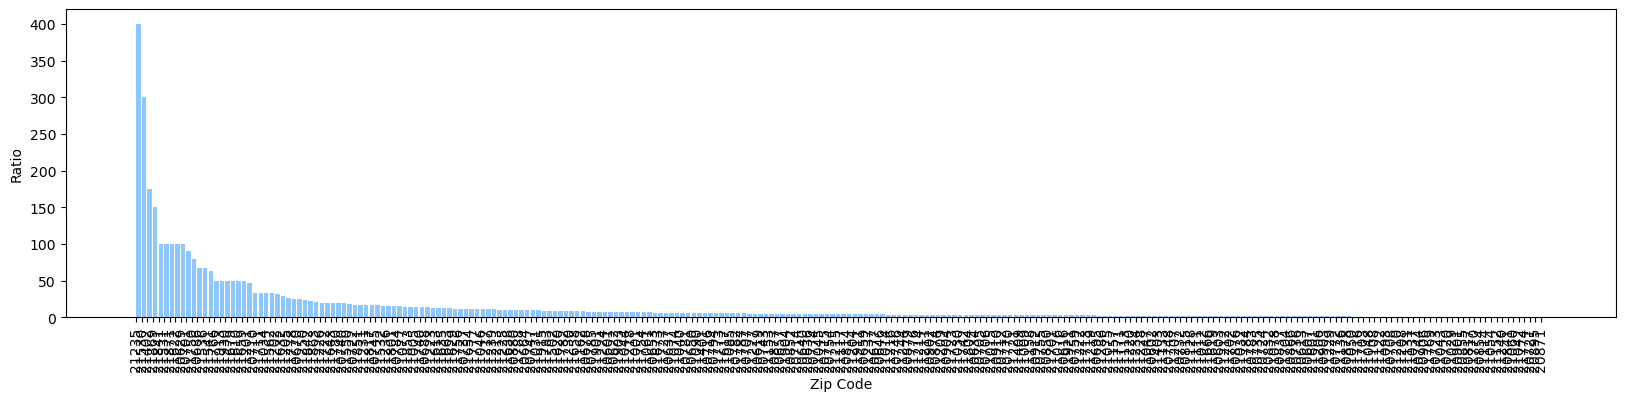

In [34]:
#Create ratio column
merged_maryland_df["EV_to_charging_station_ratio"]=round((merged_maryland_df["Charging Stations"]/merged_maryland_df["EV Count"])*100,2)
sorted_merged_maryland_df =merged_maryland_df.sort_values("EV_to_charging_station_ratio",ascending=False)

#Bar plot showing the ratio of charging stations to EVs per zipcode where there are at least one charging station and EV
ratio=sorted_merged_maryland_df["EV_to_charging_station_ratio"]
zipcode=sorted_merged_maryland_df["ZipCode"]

plt.figure(figsize=(20,4))
plt.bar(zipcode, ratio, color='dodgerblue', alpha=0.5, align="edge")
plt.xlabel("Zip Code")
plt.ylabel("Ratio")
plt.xticks(rotation="vertical")

# Save the figure
plt.savefig("visualizations/ev_bar_chart_1.png")

plt.show()

In [35]:
#Data frame with an outer merge that includes all of the data
merged_all_maryland_df = pd.merge(ev_byzipcode_df, charging_stations_byzipcode_df, on='ZipCode', how='outer')

#Peplacing NaN with 0
filtered_merged_all_maryland_df = merged_all_maryland_df.fillna(0)
filtered_merged_all_maryland_df

#Adding in a column to the data frame that calculates the ratipo between EV count and charging station by zipcode
filtered_merged_all_maryland_df["EV_to_charging_station_ratio"]=round((filtered_merged_all_maryland_df["Charging Stations"]/filtered_merged_all_maryland_df["EV Count"])*100,2)
filtered_merged_all_maryland_df_2 = filtered_merged_all_maryland_df.replace(np.inf, np.NaN)
filtered_merged_all_maryland_df_3 = filtered_merged_all_maryland_df_2.fillna(0)

#Export cleaned merged data frame so the csv file can be used in Tableau dashboard 
filtered_merged_all_maryland_df_3.to_csv("./filtered_merged_all_maryland_df_3.csv",index=False)
filtered_merged_all_maryland_df_3


,ZipCode,EV Count,Charging Stations,EV_to_charging_station_ratio
0,20854,2007.0,10.0,0.50
1,20850,1591.0,43.0,2.70
2,20878,1470.0,17.0,1.16
3,20817,1350.0,8.0,0.59
4,21042,1109.0,4.0,0.36
...,...,...,...,...
460,21864,0.0,1.0,0.00
461,21291,0.0,1.0,0.00
462,21041,0.0,1.0,0.00
463,92703,0.0,1.0,0.00


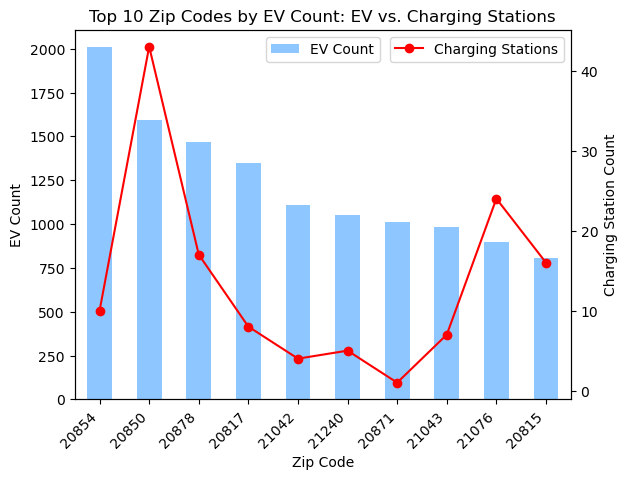

In [36]:
#A double axis chart that compared the charging station count to the EV coint for the top ten zipcodes by ev count
top_ten_bar_chart_df = filtered_merged_all_maryland_df_3.head(10)

fig, ax = plt.subplots()
top_ten_bar_chart_df.plot(kind='bar', x='ZipCode', y='EV Count', ax=ax, color='dodgerblue', alpha=0.5)

ax2 = ax.twinx()
top_ten_bar_chart_df.plot(kind='line', x='ZipCode', y='Charging Stations', ax=ax2, color='r', marker='o')

plt.title('Top 10 Zip Codes by EV Count: EV vs. Charging Stations')
ax.legend(loc="upper center")
ax2.legend(loc="upper right")

ax.set_xlabel('Zip Code')
ax.set_ylabel('EV Count')
ax2.set_ylabel('Charging Station Count')
ax.set_xticklabels(top_ten_bar_chart_df["ZipCode"], rotation=45, ha='right')

plt.savefig("visualizations/ev_combo_chart.png")
plt.show()

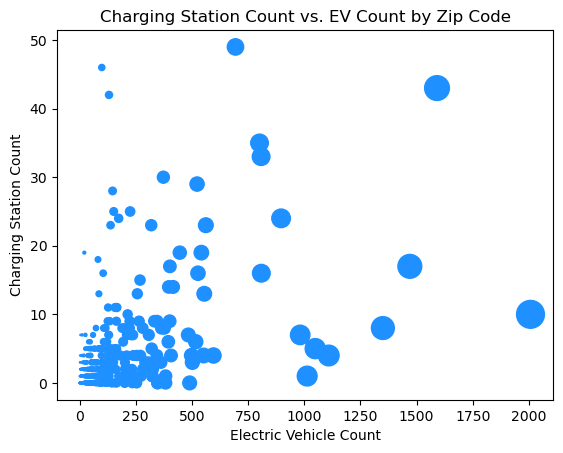

In [37]:
#Scatter plot showing the relatioship between charging station count and EV count by zip code
ev = filtered_merged_all_maryland_df_3['EV Count']
cs = filtered_merged_all_maryland_df_3['Charging Stations']

plt.scatter(ev, cs, marker='o', color='dodgerblue', s=ev/5)
plt.title('Charging Station Count vs. EV Count by Zip Code')
plt.xlabel('Electric Vehicle Count')
plt.ylabel('Charging Station Count')

plt.savefig("visualizations/ev_scatter_chart.png")
plt.show()

In [38]:
#Filtered df for zipcodes where there are zero chargin stations
filtered_merged_maryland_zero_cs_df = filtered_merged_all_maryland_df_3.loc[(filtered_merged_all_maryland_df_3['Charging Stations'] == 0)]
top_ten_zero_cs_bar_chart_df = filtered_merged_maryland_zero_cs_df.head(10)
top_ten_zero_cs_bar_chart_df

,ZipCode,EV Count,Charging Stations,EV_to_charging_station_ratio
23,20816,490.0,0.0,0.0
32,21146,383.0,0.0,0.0
38,20853,347.0,0.0,0.0
39,21144,347.0,0.0,0.0
60,20882,254.0,0.0,0.0
65,20905,235.0,0.0,0.0
80,20886,201.0,0.0,0.0
91,21163,165.0,0.0,0.0
96,20833,158.0,0.0,0.0
100,20777,148.0,0.0,0.0


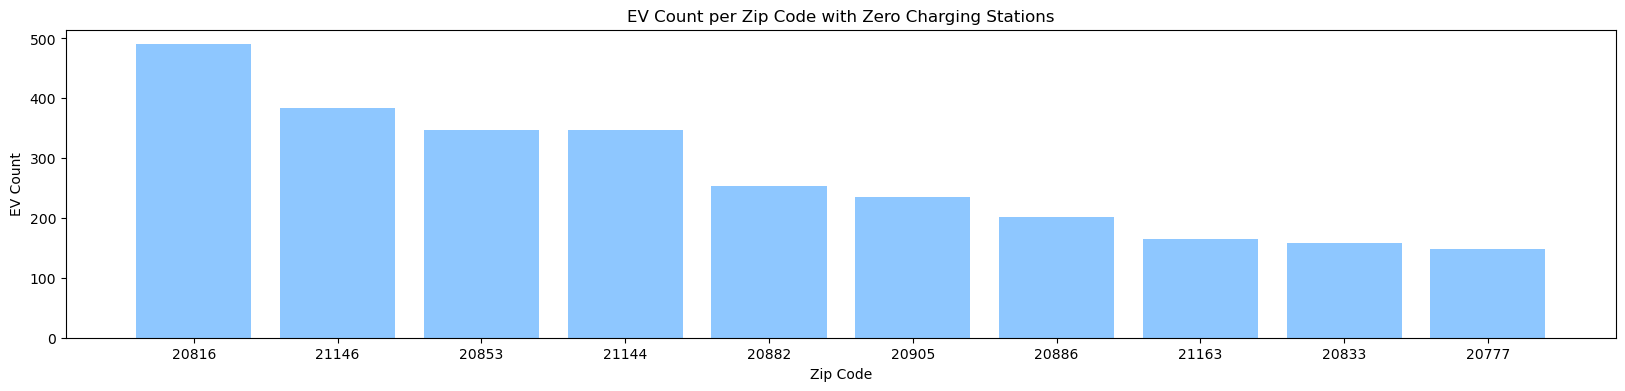

In [39]:
#Bar chart of the top ten zipcodes with zero charging stations
ev_0 = top_ten_zero_cs_bar_chart_df['EV Count']
cs_0 = top_ten_zero_cs_bar_chart_df['Charging Stations']
zipcode_0 = top_ten_zero_cs_bar_chart_df["ZipCode"]

plt.figure(figsize=(20,4))
plt.bar(zipcode_0, ev_0, color='dodgerblue', alpha=0.5, align="center", label="ZipCode")
plt.title("EV Count per Zip Code with Zero Charging Stations")
plt.xlabel("Zip Code")
plt.ylabel("EV Count")

plt.savefig("visualizations/ev_bar_chart_2.png")
plt.show()

In [40]:
merged_maryland_df.to_csv("./merged_maryland.csv",index=False)

In [41]:
%%capture --no-display

# Configure the map plot
map_1 = clean_maryland_ev_charging_stations_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = False,
    tiles = "CartoLight",
    frame_height = 500,
    frame_width= 700,
    color= "ZipCode"
    )

map_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (ZipCode)